In [ ]:
#install dependencies
%pip install opencv-python
%pip install mediapipe
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install sklearn
%pip install tensorflow

In [150]:
#import dependencies
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [151]:
#initialize holistics
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic()

In [152]:
#frame processing and labelling
def process_frame(img, model):
    # Convert the BGR image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img.flags.writeable = False

    # Process the frame with holistic model
    results = model.process(img)

    img.flags.writeable = True
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    return img, results


In [153]:
#Define landmarks
def draw_landmarks(img, results):
    mp_drawing = mp.solutions.drawing_utils
    mp_holistic = mp.solutions.holistic

    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(img, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [154]:
#define styled landmarks
def draw_styled_landmarks(img, results):
    mp_drawing = mp.solutions.drawing_utils
    mp_holistic = mp.solutions.holistic

    # Draw face landmarks
    mp_drawing.draw_landmarks(img, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

    # Draw left hand landmarks
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=4),
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=2))

    # Draw right hand landmarks
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=4),
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=1, circle_radius=2))

    # Draw pose landmarks
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=4),
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=2))

In [155]:
#Locate Landmarks
cap = cv2.VideoCapture(0)

start_time = time.time()  # Record the start time

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to receive frame.")
        break

    # Process the frame with holistic model
    img, results = process_frame(frame, holistic)
    print(results)
    draw_styled_landmarks(img, results)

    # Display the processed frame
    cv2.imshow('Processed Frame', cv2.flip(img, 1))  # Flip the frame horizontally

    # Check if 15 seconds have elapsed
    if time.time() - start_time >= 15:
        break

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

c:\Users\avant\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [156]:
print(len(results.face_landmarks.landmark))
print(len(results.pose_landmarks.landmark))
#left and right hand 21 each

468
33


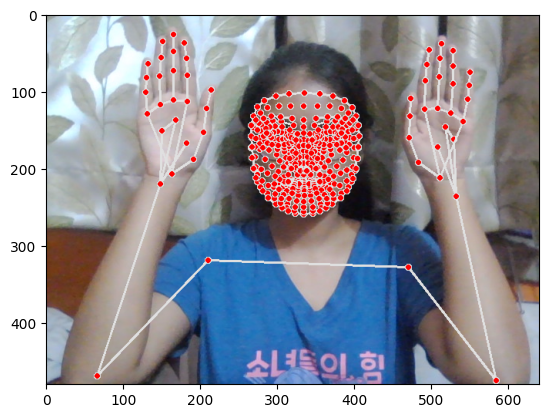

In [157]:
#display landmark
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Key Value Extraction

In [158]:
pose = []

for res in results.pose_landmarks.landmark:
  test = np.array([
    res.x, 
    res.y,
    res.z,
    res.visibility
  ])
  
  pose.append(test)

In [159]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [160]:
#print vectors
print(face)
print(pose)
lh
rh

[ 0.52325332  0.4483178  -0.02255197 ...  0.59984767  0.32216603
  0.0062711 ]
[ 5.03774822e-01  3.99149209e-01 -7.53189445e-01  9.99995351e-01
  5.43132424e-01  3.41289222e-01 -6.92260623e-01  9.99969363e-01
  5.63305378e-01  3.42013955e-01 -6.91661596e-01  9.99979138e-01
  5.79282641e-01  3.44656259e-01 -6.90768301e-01  9.99964952e-01
  4.81914192e-01  3.40954632e-01 -6.58026218e-01  9.99964714e-01
  4.62244034e-01  3.41910392e-01 -6.57983422e-01  9.99975443e-01
  4.47283685e-01  3.42670560e-01 -6.57983124e-01  9.99963582e-01
  6.10339284e-01  3.74522507e-01 -3.45751166e-01  9.99980032e-01
  4.33396757e-01  3.65043849e-01 -1.71462372e-01  9.99982715e-01
  5.39345860e-01  4.77410913e-01 -6.30876005e-01  9.99974012e-01
  4.62049156e-01  4.66984391e-01 -5.85321426e-01  9.99974668e-01
  7.35275686e-01  6.83545291e-01 -1.90527067e-01  9.99839187e-01
  3.28962833e-01  6.64633691e-01  1.75008848e-02  9.99857783e-01
  9.13565755e-01  9.89612281e-01 -7.49189794e-01  9.80892241e-01
  1.0342319

array([ 2.56200790e-01,  4.31695133e-01,  2.83826580e-07,  2.99968928e-01,
        3.92479599e-01, -2.07246467e-02,  3.19953114e-01,  3.19428116e-01,
       -2.56586690e-02,  3.25835168e-01,  2.54582107e-01, -2.91446876e-02,
        3.34535241e-01,  2.05205008e-01, -3.20046879e-02,  2.86633462e-01,
        2.37107381e-01, -7.88014289e-03,  2.87248552e-01,  1.64870724e-01,
       -2.10177377e-02,  2.84856349e-01,  1.18937865e-01, -3.30627821e-02,
        2.81011254e-01,  7.82929510e-02, -4.22724299e-02,  2.58018166e-01,
        2.33317256e-01, -7.90135283e-03,  2.58112252e-01,  1.52382836e-01,
       -1.93191096e-02,  2.58373886e-01,  1.00529775e-01, -3.02219614e-02,
        2.58332461e-01,  5.57869226e-02, -3.83362249e-02,  2.31603682e-01,
        2.44893923e-01, -1.16024408e-02,  2.30310887e-01,  1.68726474e-01,
       -2.39725988e-02,  2.33482376e-01,  1.18570402e-01, -3.29226814e-02,
        2.36976817e-01,  7.42393732e-02, -3.92246060e-02,  2.05515847e-01,
        2.68881172e-01, -

In [161]:
#extract keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [162]:
rest= extract_keypoints(results)
rest

array([ 0.50377482,  0.39914921, -0.75318944, ...,  0.20675693,
        0.13433486, -0.03985135])

In [163]:
468*3+33*4+21*3+21*3

1662

In [164]:
np.save('0', rest)
np.load('0.npy')

array([ 0.50377482,  0.39914921, -0.75318944, ...,  0.20675693,
        0.13433486, -0.03985135])

In [165]:
# Path for exported data, numpy arrays
#Setup folder path
dpath = os.path.join('data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'mother'])

# Thirty videos worth of data
no_seq = 30

# Videos are going to be 30 frames in length
seq_length = 30

for action in actions: 
    for sequence in range(no_seq):
        try: 
            os.makedirs(os.path.join(dpath, action, str(sequence)))
        except:
            pass

In [166]:
#Collecting keypoints for training and testing
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_seq):
            # Loop through video length aka sequence length
            for frame_num in range(seq_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = process_frame(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(dpath, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [167]:
#Preprocess data and create labels and features
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [168]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'mother': 2}

In [169]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_seq):
        window = []
        for frame_num in range(seq_length):
            res = np.load(os.path.join(dpath, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [170]:
np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
X.shape
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [171]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(5, 3)

Build And Train LSTM

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [173]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\avant\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [174]:
res = [.7, 0.2, 0.1]
actions[np.argmax(res)]
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=2000,batch_size=32, validation_split=0.2, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 527ms/step - categorical_accuracy: 0.3449 - loss: 1.0960 - val_categorical_accuracy: 0.2941 - val_loss: 4.2301
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.3943 - loss: 3.5996 - val_categorical_accuracy: 0.2941 - val_loss: 5.2469
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.2881 - loss: 7.8822 - val_categorical_accuracy: 0.5294 - val_loss: 5.7794
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.2240 - loss: 8.2412 - val_categorical_accuracy: 0.2941 - val_loss: 14.5070
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.2764 - loss: 8.7273 - val_categorical_accuracy: 0.1765 - val_loss: 5.3544
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.2916 - loss: 21.0249 - val_categorical_accuracy: 0.4118 - val_loss: 49.2608
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - categorical_accuracy: 0.2721 - loss:

In [175]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

Make Predictions

In [176]:
res = model.predict(X_test)
actions[np.argmax(res[4])]
actions[np.argmax(y_test[4])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


'thanks'

In [177]:
model.save('action.keras')
model.load_weights('action.keras')

In [178]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [179]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [181]:
accuracy_score(ytrue, yhat)

1.0

Real-Time Testing

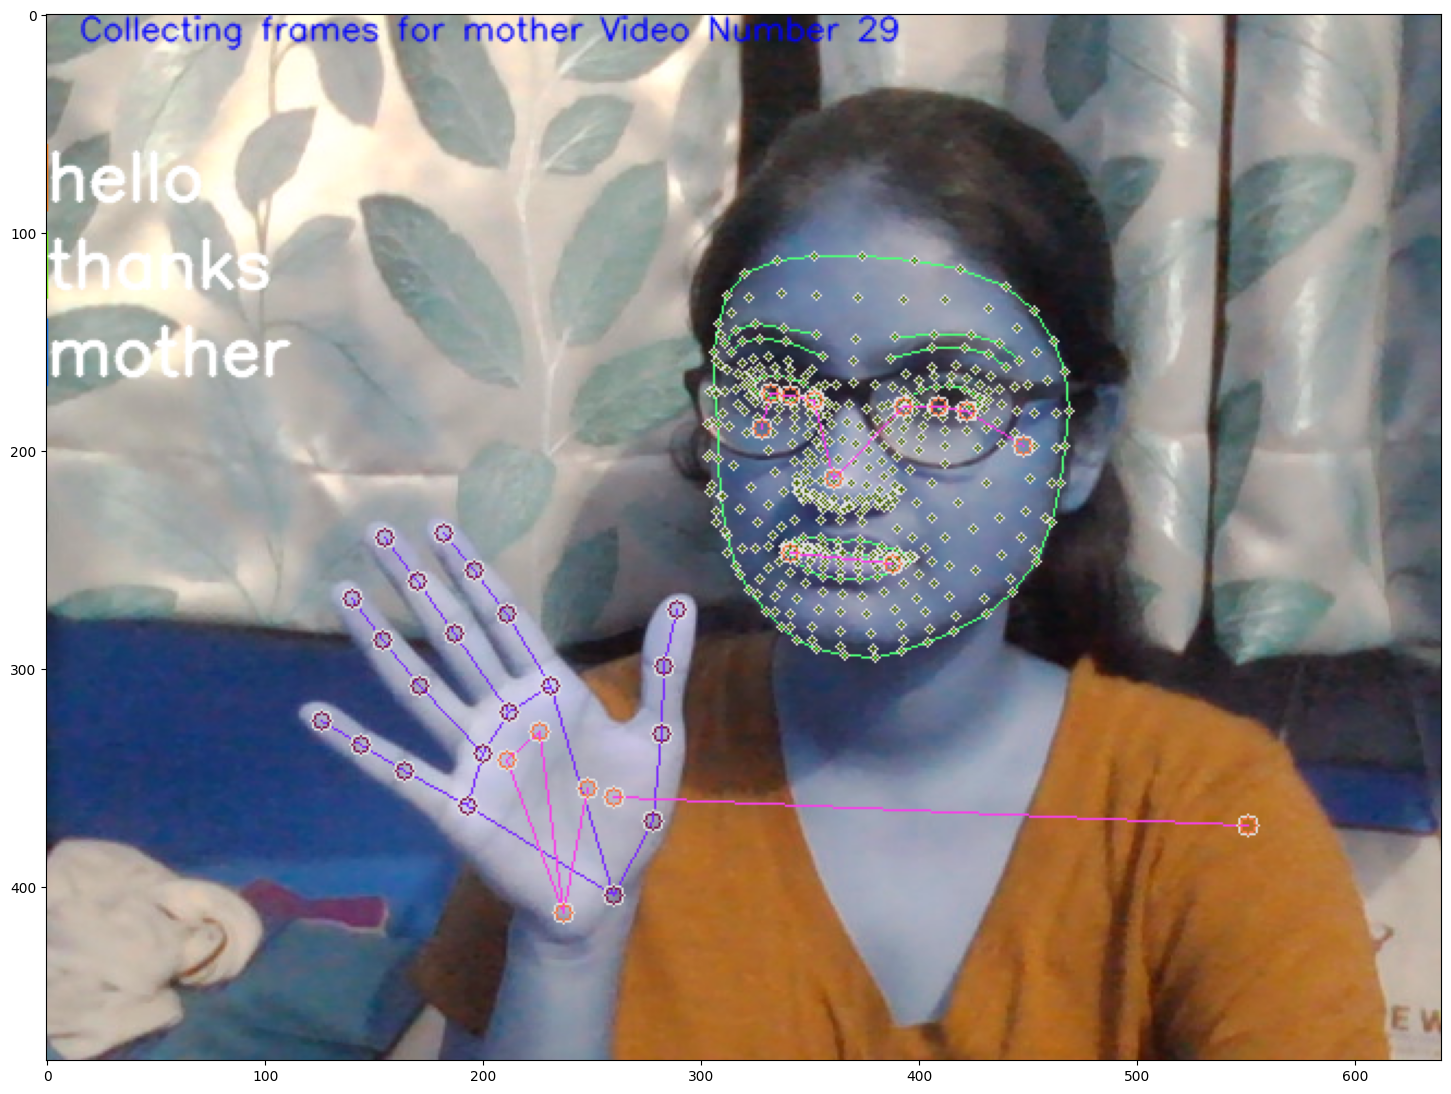

In [182]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        if num >= len(colors):
            print(f"Warning: Not enough colors provided. Skipping index {num}.")
            continue

        # Ensure prob is a scalar value
        if isinstance(prob, (list, np.ndarray)):
            prob = float(prob[0])
        
        # Draw the rectangle
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        # Put the text
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame

plt.figure(figsize=(18, 18))
plt.imshow(prob_viz(res, actions, image, colors))
plt.show()


In [183]:
sequences.reverse()
len(sequences)
sequences.append('def')
sequences.reverse()
sequences[-30:]

[[array([ 0.56732547,  0.43751508, -1.22434664, ...,  0.21620877,
          0.65474057, -0.08869601]),
  array([ 0.56737411,  0.43622768, -1.21894395, ...,  0.21392813,
          0.65216732, -0.0864818 ]),
  array([ 0.56727833,  0.4365586 , -1.21189237, ...,  0.21395637,
          0.65725696, -0.09340256]),
  array([ 0.43477947,  0.93257356, -1.97652209, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.4914116 ,  0.61436963, -1.57158256, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.52330786,  0.45769331, -0.56975448, ...,  0.4110176 ,
          0.47117996, -0.01621726]),
  array([ 0.52218926,  0.45598844, -0.55668855, ...,  0.41069525,
          0.47084582, -0.01502054]),
  array([ 0.52149951,  0.45550403, -0.55229485, ...,  0.41019443,
          0.47149232, -0.01442648]),
  array([ 0.52055353,  0.45543873, -0.56253964, ...,  0.40507454,
          0.4722628 , -0.01500877]),
  array([ 0.51982468,  0.45527735, -0.5636946 , ...,  0.40494353,
       

In [184]:
# 1. New detection variables
sequences = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = process_frame(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequences.append(keypoints)
        sequences = sequences[-30:]
        
        if len(sequences) == 30:
            res = model.predict(np.expand_dims(sequences, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\avant\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [185]:
cap.release()
cv2.destroyAllWindows()